<a href="https://colab.research.google.com/github/cesarinrc07-ship-it/Estad-stica2025B/blob/main/Tarea_viernes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
url = "https://raw.githubusercontent.com/cesarinrc07-ship-it/Estad-stica2025B/refs/heads/main/test_energy_data.csv"
df = pd.read_csv(url)
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [7]:
df.columns


Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [8]:
df.columns =['building_type', 'square_footage', 'number_of_occupants','appliances_used', 'average_temperature', 'day_of_week','energy_consumption']



In [9]:
df.columns


Index(['building_type', 'square_footage', 'number_of_occupants',
       'appliances_used', 'average_temperature', 'day_of_week',
       'energy_consumption'],
      dtype='object')

In [10]:
df["building_type"] = df["building_type"].map({"Residential": 0, "Commercial": 1, "Industrial": 2})

In [11]:
df["day_of_week"] = df["day_of_week"].map({"Weekday": 0, "Weekend": 1})


¿qué relación parece existir entre el tamaño del edificio (square_footage) y el consumo de energía (energy_kwh)?

Coeficiente de correlación:  0.7240

Coeficiente de determinación:  0.5242

valor-p de Shapiro:  0.1608

valor_p de Breusch-Pagan:  0.1022



,df,sum_sq,mean_sq,F,PR(>F)
square_footage,1.0,3.597413e+07,3.597413e+07,107.983064,1.713693e-17
Residual,98.0,3.264831e+07,3.331460e+05,NaN,NaN


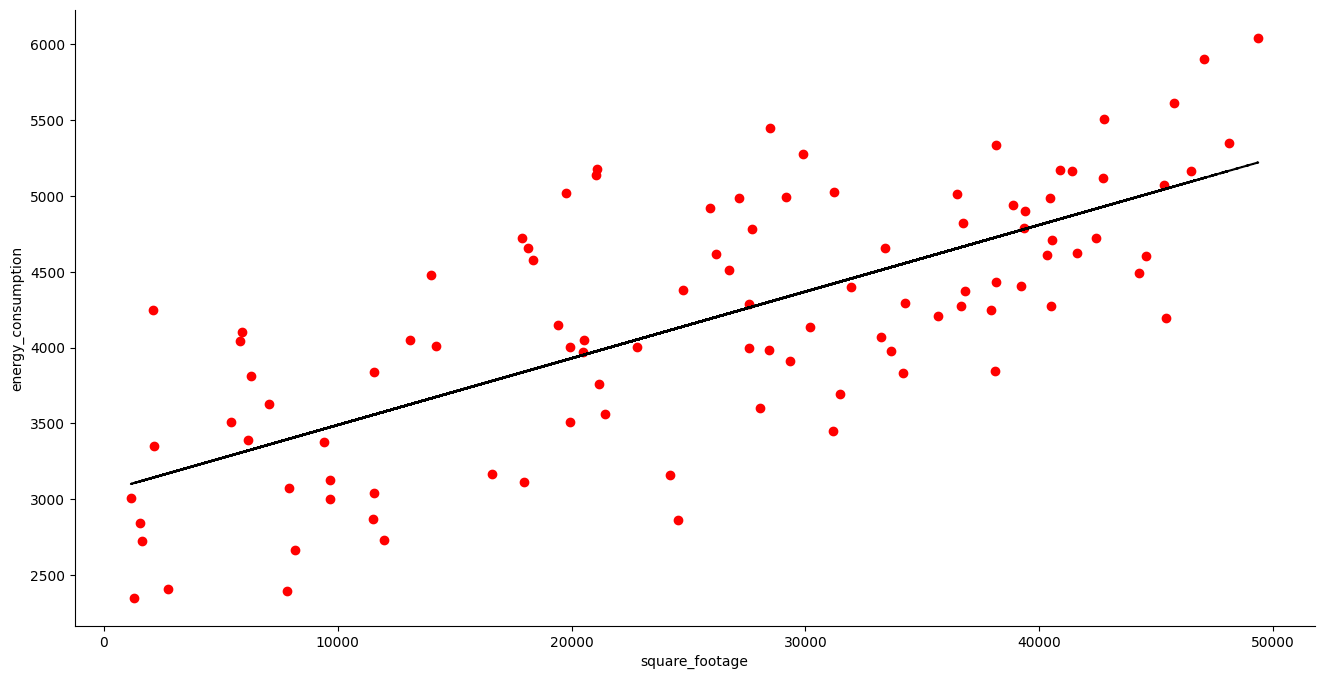

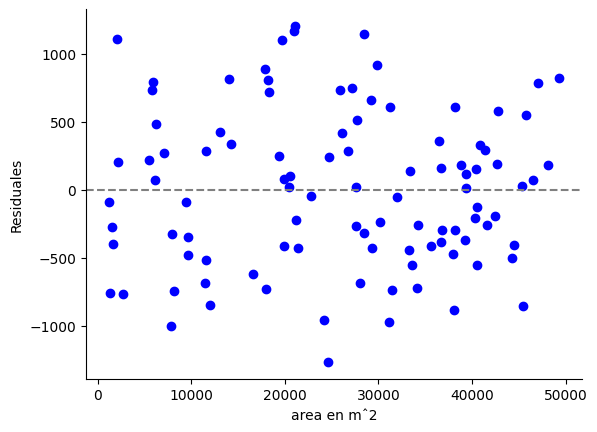

In [12]:
x = df["square_footage"]
y = df["energy_consumption"]

#Diagrama de dispersión
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 8), dpi = 100)
plt.scatter(x, y, label = "Child_height", color = 'red')
plt.xlabel('square_footage') # nombrar eje x
plt.ylabel('energy_consumption') # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)

#Coeficiente de correlación
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

#Recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

plt.plot(x, yc, color = 'black', linestyle = '--')

#Coeficiente de determinación
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
#nivel_de_confianza = 0.95
#intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
#intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
#print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
#print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

#Residuales
residuales = modelo.resid
plt.figure()
plt.scatter(x, residuales, color = 'blue')
plt.xlabel('area en mˆ2')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)

#Prueba de Shapiro.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

#Prueba de Brausch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
#print(f'para x = 70, y = {modelo.predict([1, 70])}')
#print(f'para x = 75, y = {modelo.predict([1, 75])}')
#print(f'para x = 84, y = {modelo.predict([1, 84])}\n')

# Tabla ANOVA.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('energy_consumption ~ square_footage', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

¿Qué tipo de relación observas entre el número de ocupantes (occupants) y el consumo de energía?

Coeficiente de correlación:  0.3086

Coeficiente de determinación:  0.0952

valor-p de Shapiro:  0.1174

valor_p de Breusch-Pagan:  0.3065



,df,sum_sq,mean_sq,F,PR(>F)
number_of_occupants,1.0,6.534916e+06,6.534916e+06,10.314824,0.001786
Residual,98.0,6.208752e+07,6.335461e+05,NaN,NaN


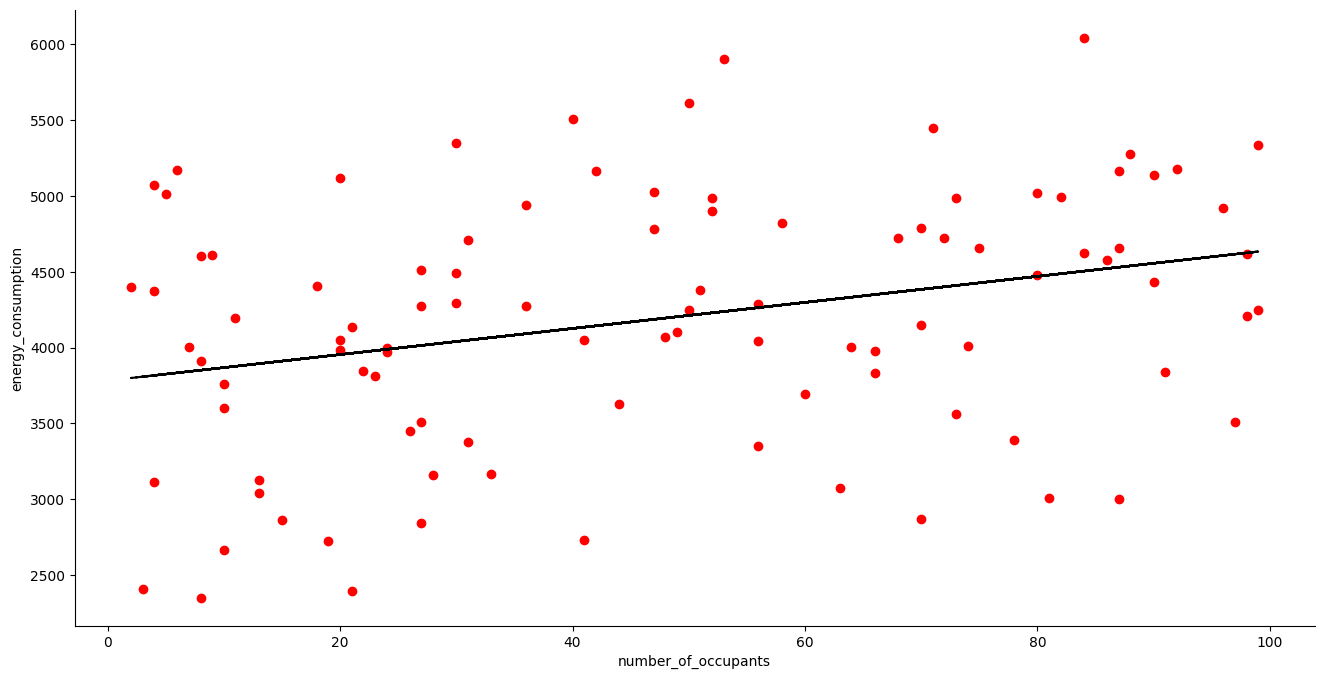

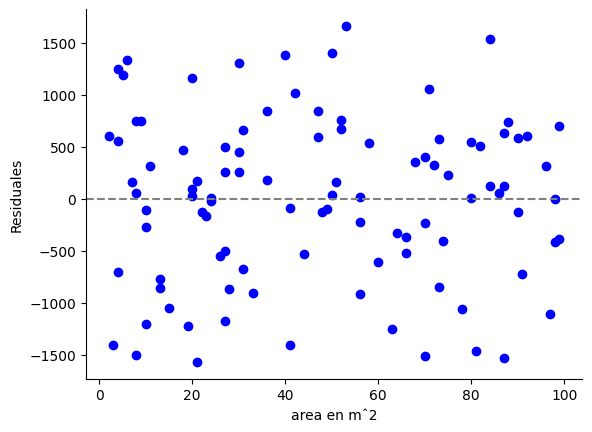

In [13]:
x = df["number_of_occupants"]
y = df["energy_consumption"]

#Diagrama de dispersión
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 8), dpi = 100)
plt.scatter(x, y, label = "Child_height", color = 'red')
plt.xlabel('number_of_occupants') # nombrar eje x
plt.ylabel('energy_consumption') # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)

#Coeficiente de correlación
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

#Recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

plt.plot(x, yc, color = 'black', linestyle = '--')

#Coeficiente de determinación
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
#nivel_de_confianza = 0.95
#intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
#intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
#print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
#print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

#Residuales
residuales = modelo.resid
plt.figure()
plt.scatter(x, residuales, color = 'blue')
plt.xlabel('area en mˆ2')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)

#Prueba de Shapiro.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

#Prueba de Brausch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
#print(f'para x = 70, y = {modelo.predict([1, 70])}')
#print(f'para x = 75, y = {modelo.predict([1, 75])}')
#print(f'para x = 84, y = {modelo.predict([1, 84])}\n')

# Tabla ANOVA.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('energy_consumption ~ number_of_occupants', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

Analiza si existe alguna relación evidente entre el conteo de aparatos (appliances) y el consumo de energía.

Coeficiente de correlación:  0.1764

Coeficiente de determinación:  0.0311

valor-p de Shapiro:  0.1920

valor_p de Breusch-Pagan:  0.1031



,df,sum_sq,mean_sq,F,PR(>F)
appliances_used,1.0,2.134848e+06,2.134848e+06,3.146678,0.079188
Residual,98.0,6.648759e+07,6.784448e+05,NaN,NaN


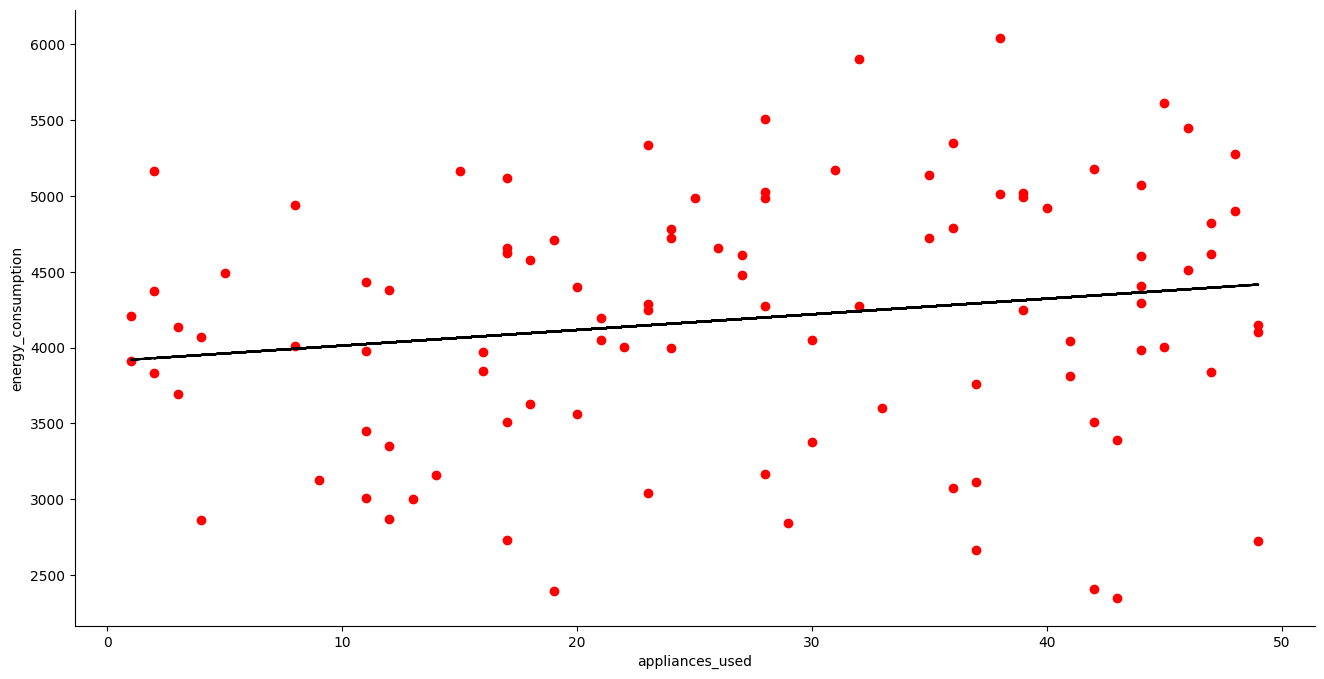

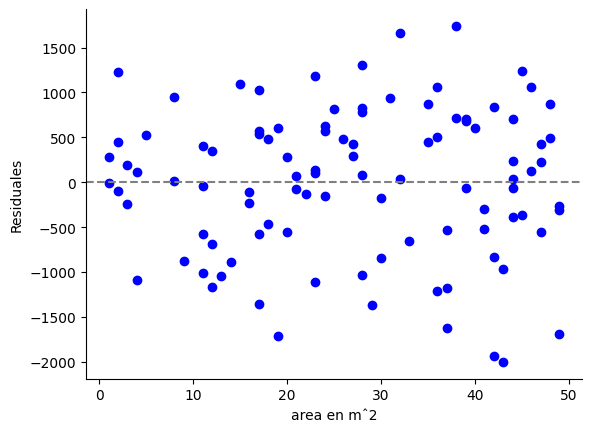

In [14]:
x = df["appliances_used"]
y = df["energy_consumption"]

#Diagrama de dispersión
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 8), dpi = 100)
plt.scatter(x, y, label = "Child_height", color = 'red')
plt.xlabel('appliances_used') # nombrar eje x
plt.ylabel('energy_consumption') # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)

#Coeficiente de correlación
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

#Recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

plt.plot(x, yc, color = 'black', linestyle = '--')

#Coeficiente de determinación
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
#nivel_de_confianza = 0.95
#intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
#intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
#print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
#print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

#Residuales
residuales = modelo.resid
plt.figure()
plt.scatter(x, residuales, color = 'blue')
plt.xlabel('area en mˆ2')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)

#Prueba de Shapiro.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

#Prueba de Brausch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
#print(f'para x = 70, y = {modelo.predict([1, 70])}')
#print(f'para x = 75, y = {modelo.predict([1, 75])}')
#print(f'para x = 84, y = {modelo.predict([1, 84])}\n')

# Tabla ANOVA.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('energy_consumption ~ appliances_used', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

¿cómo influye el tipo de edificio (building_type) en el consumo de energía? Comenta diferencias entre categorías.

Coeficiente de correlación:  0.4329

Coeficiente de determinación:  0.1874

valor-p de Shapiro:  0.1387

valor_p de Breusch-Pagan:  0.3317



,df,sum_sq,mean_sq,F,PR(>F)
appliances_used,1.0,2.134848e+06,2.134848e+06,3.146678,0.079188
Residual,98.0,6.648759e+07,6.784448e+05,NaN,NaN


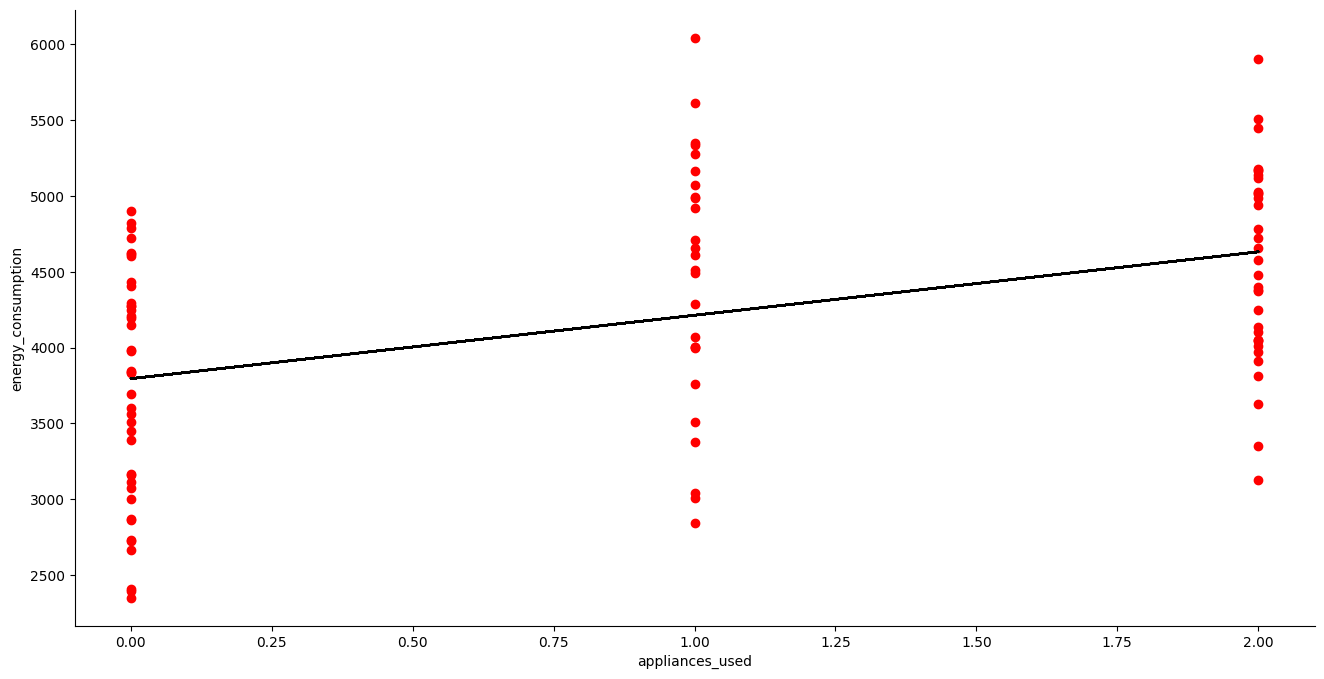

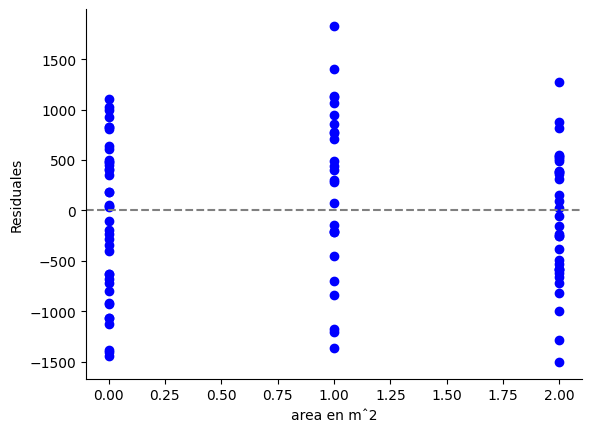

In [15]:
x = df["building_type"]
y = df["energy_consumption"]

#Diagrama de dispersión
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 8), dpi = 100)
plt.scatter(x, y, label = "Child_height", color = 'red')
plt.xlabel('appliances_used') # nombrar eje x
plt.ylabel('energy_consumption') # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)

#Coeficiente de correlación
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

#Recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

plt.plot(x, yc, color = 'black', linestyle = '--')

#Coeficiente de determinación
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
#nivel_de_confianza = 0.95
#intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
#intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
#print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
#print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

#Residuales
residuales = modelo.resid
plt.figure()
plt.scatter(x, residuales, color = 'blue')
plt.xlabel('area en mˆ2')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)

#Prueba de Shapiro.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

#Prueba de Brausch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
#print(f'para x = 70, y = {modelo.predict([1, 70])}')
#print(f'para x = 75, y = {modelo.predict([1, 75])}')
#print(f'para x = 84, y = {modelo.predict([1, 84])}\n')

# Tabla ANOVA.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('energy_consumption ~ appliances_used', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

Propón una expresión matemática que permita estimar energy_kwh a partir de los atributos del edificio y el entorno (elige las variables que consideres más relevantes y justifícalo).

In [16]:
df.columns

Index(['building_type', 'square_footage', 'number_of_occupants',
       'appliances_used', 'average_temperature', 'day_of_week',
       'energy_consumption'],
      dtype='object')

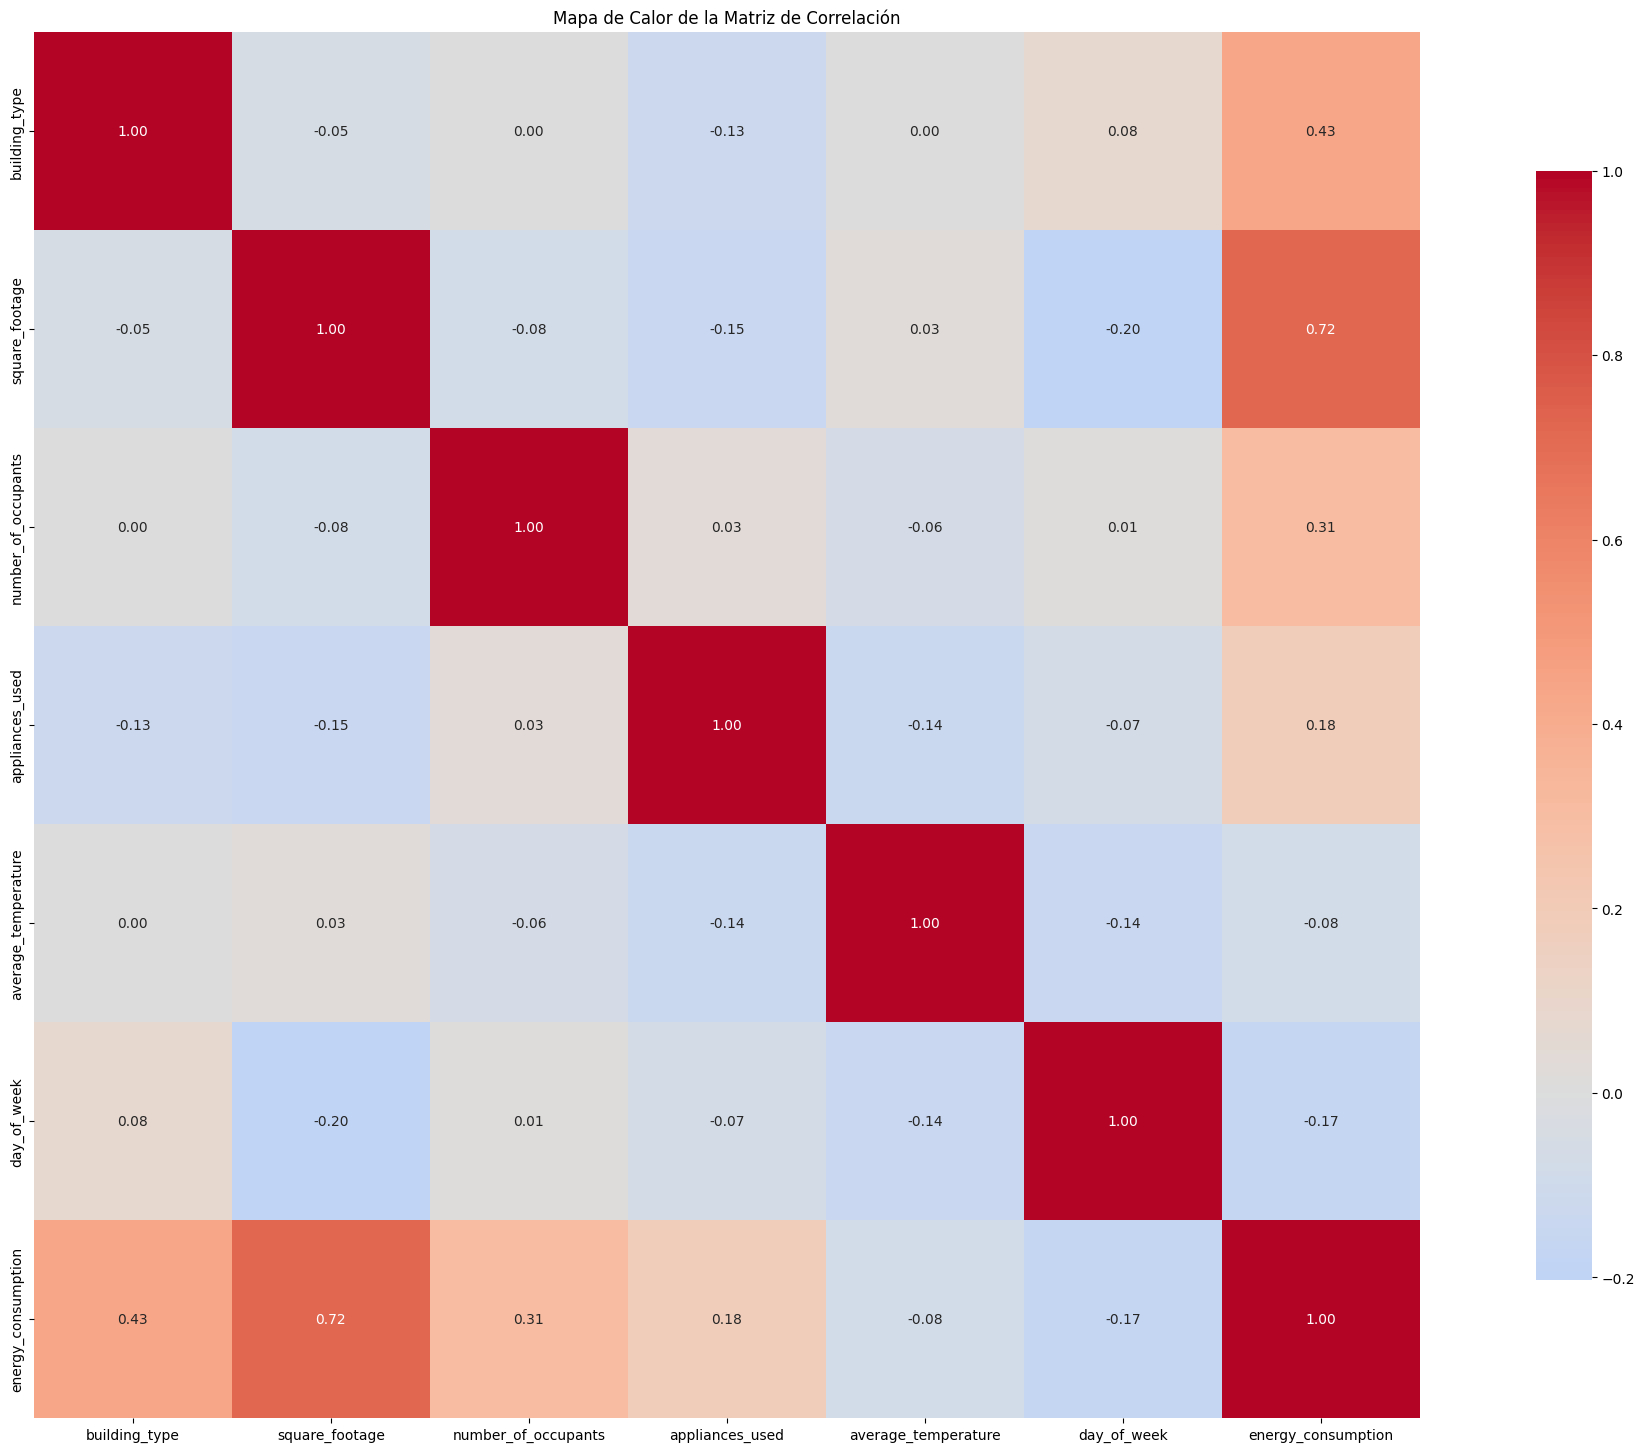

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(30, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, center=0, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()


In [18]:
df.columns

Index(['building_type', 'square_footage', 'number_of_occupants',
       'appliances_used', 'average_temperature', 'day_of_week',
       'energy_consumption'],
      dtype='object')

In [19]:
x = df[["square_footage","building_type","number_of_occupants"]]
y = df["energy_consumption"]

# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

# plt.plot(x, yc, color = 'black', linestyle = '--')

# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?

print(f'para x_1=2, x_2 = 2 y x_3 = 160, y = {modelo.predict([1, 2, 2, 160])} calorias quemadas\n')

# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('energy_consumption ~ square_footage + building_type + number_of_occupants' , data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

Coeficiente de determinación:  0.8798

valor-p de Shapiro:  0.1387

valor_p de Breusch-Pagan:  0.3515

para x_1=2, x_2 = 2 y x_3 = 160, y = [4607.74562288] calorias quemadas



,df,sum_sq,mean_sq,F,PR(>F)
square_footage,1.0,3.597413e+07,3.597413e+07,418.701729,8.868245e-37
building_type,1.0,1.508928e+07,1.508928e+07,175.623600,2.091966e-23
number_of_occupants,1.0,9.310880e+06,9.310880e+06,108.369039,1.961914e-17
Residual,96.0,8.248153e+06,8.591826e+04,NaN,NaN


In [20]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:     energy_consumption   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     234.2
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           5.06e-44
Time:                        14:34:47   Log-Likelihood:                -707.91
No. Observations:                 100   AIC:                             1424.
Df Residuals:                      96   BIC:                             1434.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2054.6612    

In [21]:
def estimate_energy_consumption(square_footage, building_type, number_of_occupants):
  """
  Estimates energy consumption based on building attributes.

  Args:
    square_footage: The square footage of the building.
    building_type: The type of building (0 for Residential, 1 for Commercial, 2 for Industrial).
    number_of_occupants: The number of occupants in the building.

  Returns:
    The estimated energy consumption.
  """
  # Coefficients from the OLS regression model
  const = 2054.6612
  coef_square_footage = 0.0472
  coef_building_type = 453.4442
  coef_number_of_occupants = 10.2881

  estimated_consumption = const + (coef_square_footage * square_footage) + \
                          (coef_building_type * building_type) + \
                          (coef_number_of_occupants * number_of_occupants)

  return estimated_consumption

# Example usage:
# estimated_kwh = estimate_energy_consumption(square_footage=25000, building_type=1, number_of_occupants=50)
# print(f"Estimated energy consumption: {estimated_kwh:.2f}")

In [22]:
df


,building_type,square_footage,number_of_occupants,appliances_used,average_temperature,day_of_week,energy_consumption
0,0,24563,15,4,28.52,0,2865.57
1,1,27583,56,23,23.07,1,4283.80
2,1,45313,4,44,33.56,0,5067.83
3,0,41625,84,17,27.39,1,4624.30
4,0,36720,58,47,17.08,0,4820.59
...,...,...,...,...,...,...,...
95,1,1161,81,11,15.45,1,3010.81
96,0,37943,50,23,21.73,1,4248.49
97,1,1558,27,29,16.86,1,2843.60
98,2,2145,56,12,11.77,1,3348.39
